#### 6주차 Assignment
diabetes 데이터 세트로 DNN 회귀

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats  # 과학용 계산 라이브러리

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/yoojm/AIStudy/practice/Dataset/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
x = df.drop('Outcome', axis=1)
X = x.drop(columns=['BMI'], axis = 1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33


In [5]:
y = x['BMI']
y.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [6]:
X = X.values
X

array([[  6.   , 148.   ,  72.   , ...,   0.   ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.   ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,   0.   ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ..., 112.   ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,   0.   ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.   ,   0.315,  23.   ]])

In [7]:
y

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((614, 7), (614,), (154, 7), (154,))

In [9]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(7,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 64        
                                                                 
 dense_1 (Dense)             (None, 30)                270       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 30)                930       
                                                                 
 dense_4 (Dense)             (None, 1)                 31        
                                                                 
Total params: 2,225
Trainable params: 2,225
Non-trainable params: 0
_________________________________________________________________


In [10]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
20/20 [==============================] - 1s 14ms/step - loss: 997.8969 - mse: 997.8969 - val_loss: 178.1000 - val_mse: 178.1000
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 97.0706 - mse: 97.0706 - val_loss: 68.5361 - val_mse: 68.5361
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 62.2131 - mse: 62.2131 - val_loss: 71.6672 - val_mse: 71.6672
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 62.5925 - mse: 62.5925 - val_loss: 71.1412 - val_mse: 71.1412
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 60.6294 - mse: 60.6294 - val_loss: 66.7903 - val_mse: 66.7903
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 59.9810 - mse: 59.9810 - val_loss: 70.3719 - val_mse: 70.3719
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 60.3298 - mse: 60.3298 - val_loss: 80.5271 - val_mse: 80.5271
Epoch 8/10
20/20 [==============================] - 0s 4m

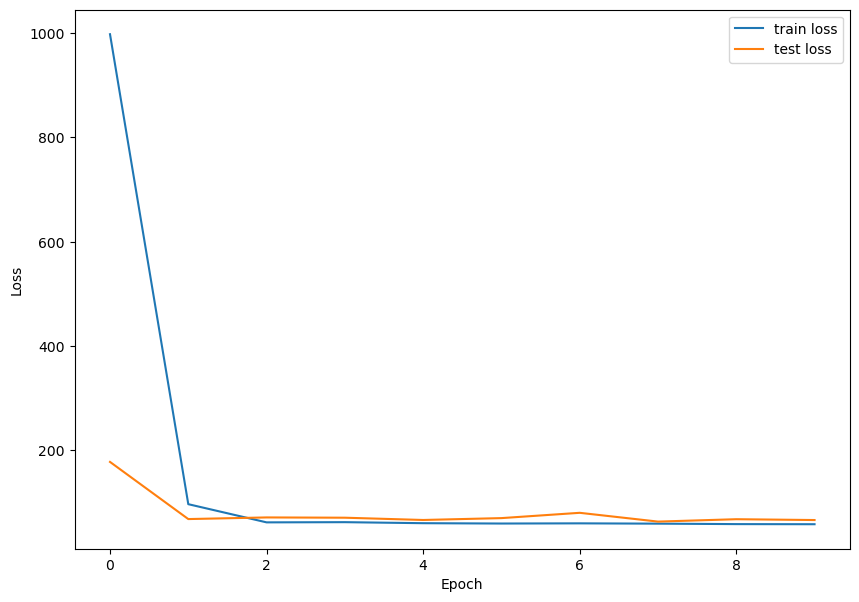

In [11]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 66.6718 - mse: 66.6718


[66.67182922363281, 66.67182922363281]